In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from datetime import datetime
import pygmt

In [28]:
data = pd.read_csv('query.csv')
nrcan_data = pd.read_csv('bc_earthquakes_nrcan.eq', delimiter='|')
print(nrcan_data.head())
fms = pd.read_csv('bc_earthquakes.eq', header=None, delim_whitespace=True, usecols=lambda x: x != 12)
# save fms to a file
fms.to_csv('fms.eq', index=False, header=False, sep=' ')

       #EventID                      Time  Latitude  Longitude  Depth/km  \
0  2.024092e+07  2024-09-15T22:22:43.000Z   51.3643  -130.9513        10   
1  2.023041e+07  2023-04-13T15:54:54.000Z   49.1051  -129.6483        10   
2  2.019123e+07  2019-12-25T03:35:59.000Z   50.4851  -130.0955        10   
3  2.019122e+07  2019-12-23T20:56:21.000Z   50.2903  -130.0174        10   
4  2.019122e+07  2019-12-23T19:49:41.000Z   50.4871  -130.0940        10   

  MagType  Magnitude                                  EventLocationName  
0      Mw       6.46  252 km WNW of Port Hardy, BC, felt/252 km ONO ...  
1      Mw       5.65  212 km SW of Port Alice, BC/212 km SO de Port ...  
2      Mw       6.20  185 km W of Port Hardy, BC/185 km O de Port Ha...  
3      Mw       6.10  182 km W of Port Alice, BC/182 km O de Port Al...  
4      Mw       6.00  185 km W of Port Hardy, BC/185 km O de Port Ha...  


C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\3417793890.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fms = pd.read_csv('bc_earthquakes.eq', header=None, delim_whitespace=True, usecols=lambda x: x != 12)


Text(0, 0.5, 'Latitude')

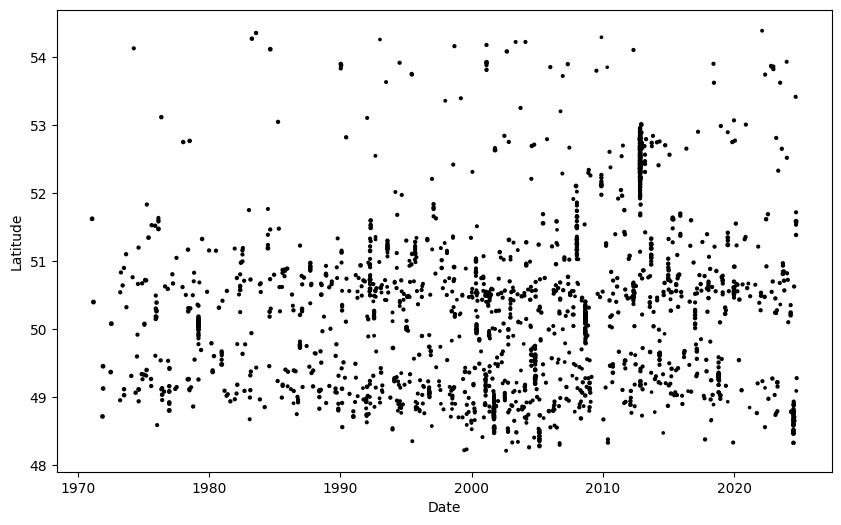

In [29]:
# plot histogram of events with respect to time
data['time'] = pd.to_datetime(data['time'])
data['time'] = data['time'].dt.tz_localize(None)
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)
data['mag'] = data['mag'].astype(float)

nrcan_data['time'] = pd.to_datetime(nrcan_data['Time'])
nrcan_data['time'] = nrcan_data['time'].dt.tz_localize(None)
nrcan_data['latitude'] = nrcan_data['Latitude'].astype(float)
nrcan_data['longitude'] = nrcan_data['Longitude'].astype(float)
nrcan_data['mag'] = nrcan_data['Magnitude'].astype(float)

plt.figure(figsize=(10,6))
plt.scatter(data['time'], data['latitude'], c='k', s=data['mag'])
plt.xlabel('Date')
plt.ylabel('Latitude')


In [25]:
# search for magnitude 6 and above
data_m6 = data[data['mag'] >= 6]
mindate = datetime(2008, 1, 3)
maxdate = datetime(2008, 1, 10)
data_clipped = data[data['time'] >= mindate][data['time'] <= maxdate]

date_list = [(datetime(2008, 1, 5, 11, 1, 0), datetime(2008, 1, 7, 11, 1, 0)), 
             (datetime(2013, 9, 3, 20, 19, 0), datetime(2013, 9, 5, 20, 19, 0)), 
             (datetime(2018, 10, 22, 5, 39, 32), datetime(2018, 10, 24, 5, 39, 32)), 
             (datetime(2019, 12, 23, 19, 49, 40), datetime(2019, 12, 25, 19, 49, 40))]

fms_list = ['2008_doublet', '2013_doublet', '2018_triplet', '2019_triplet']

symbol_list = ['c', 'd', 'i', 's']

C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\2641350302.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = data[data['time'] >= mindate][data['time'] <= maxdate]


In [5]:
region = [
    -132,
    -128,
    48.8,
    52] # whole region

# region = [
#     -131.5,
#     -130,
#     50.8,
#     51.7] # 2008, 2013 doublets

print(data_clipped['longitude'].min(), data_clipped['longitude'].max(), data_clipped['latitude'].min(), data_clipped['latitude'].max())

fig = pygmt.Figure()
fig.basemap(region=region, projection='M6i', frame=True)
# grid_map = pygmt.datasets.load_earth_relief(
#     resolution="30s",
#     region=region,
# )
# fig.grdimage(grid='bathymetry.tiff', 
#              region=region,
#              cmap="oleron",
#              frame=True)

# colormap based on timestamp
pygmt.makecpt(cmap='jet', 
              series=[int(mindate.strftime("%Y%m%d")), int(maxdate.strftime("%Y%m%d"))])

fig.plot(x=data_clipped['longitude'], 
         y=data_clipped['latitude'], 
         style='c', 
         pen="0.2p,black",
         size=data_clipped['mag']**2 * 0.01,
         fill=data_clipped['time'].apply(lambda d: int(d.strftime("%Y%m%d"))), 
         cmap=True)
# fig.plot(x=data_m6['longitude'], y=data_m6['latitude'], style='a0.5c', fill='red')
fig.meca('C:/Users/lekim/OneDrive/Desktop/School/uvic/other/2008_doublet.eq', 
         scale=0.3, 
         convention='mt')
fig.colorbar(frame='af+lDate')

# fig.savefig('2008_doublet.png')

-131.746 -130.102 51.028 52.019


In [6]:
fig = pygmt.Figure()
fig.basemap(region=region, projection='M6i', frame=True)
grid_map = pygmt.datasets.load_earth_relief(
    resolution="30s",
    region=region)

fig.grdimage(grid='bathymetry.tiff', 
             region=region,
             cmap="oleron",
             nan_transparent=True,
             frame=True)

fig.grdimage(grid=grid_map,
             cmap="oleron",
             frame=True)

for date_pair, fms_name, symbol in zip(date_list, fms_list, symbol_list):

    # cut data
    data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]
    print(data_clipped['longitude'])

    # extract time range
    min_date = date_pair[0]
    max_date = date_pair[1] #data_clipped['time'].max()

    # make colormap
    pygmt.makecpt(cmap='inferno', 
                  series=[int(min_date.strftime("%Y%m%d%H%M%S")), int(max_date.strftime("%Y%m%d%H%M%S"))])
    
    fig.plot(x=data_clipped['longitude'], 
         y=data_clipped['latitude'], 
         style=symbol, 
         pen="0.2p,black",
         size=1.9**data_clipped['mag'] * 0.015,
         fill=data_clipped['time'].apply(lambda d: int(d.strftime("%Y%m%d%H%M%S"))), 
         cmap=True)
    
    fig.meca(fms_name + '.eq',
                scale=0.4, 
                convention='mt')

pygmt.makecpt(cmap='inferno',
              series=[0, 48])

fig.colorbar(frame='af+lHours after first event')

# labels
fig.text(x=-130.78, y=51.39, text='2008-10-22 doublet', font='11p,Helvetica-Bold,white', justify='CB')
fig.text(x=-129.5, y=51.2, text='2013-09-03 doublet', font='11p,Helvetica-Bold', justify='LC')
fig.text(x=-128.6, y=49.25, text='2018-10-22 Triplet', font='11p,Helvetica-Bold, white', justify='LC')
fig.text(x=-129.4, y=50.35, text='2019-12-23 Triplet', font='11p,Helvetica-Bold,white', justify='LC')

# zoom in
lon_min, lat_min = -131.5, 50.8
lon_max, lat_max = -130, 51.7
rectangle = [
    [lon_min, lat_min],
    [lon_max, lat_min],
    [lon_max, lat_max],
    [lon_min, lat_max],
    [lon_min, lat_min]  # Closing the polygon
]

# Plot the rectangle
# fig.plot(
#     x=[coord[0] for coord in rectangle],  # Extract longitudes
#     y=[coord[1] for coord in rectangle],  # Extract latitudes
#     pen="2p,red")  # Pen thickness and color
    

# fig.savefig('bc_multiplets.png')

C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\1176337230.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]
C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\1176337230.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]
C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\1176337230.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]
C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\1176337230.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]


773   -131.034
774   -131.285
775   -131.330
776   -131.223
777   -131.044
778   -130.667
779   -131.746
780   -130.919
781   -130.102
782   -130.737
783   -131.158
784   -131.310
785   -131.380
786   -131.080
787   -130.277
788   -131.095
789   -130.974
790   -131.428
791   -131.052
792   -130.542
793   -131.073
794   -130.868
795   -131.677
796   -130.746
Name: longitude, dtype: float64
327   -130.5088
328   -130.5600
329   -130.6400
330   -130.5932
331   -130.5110
332   -130.1497
333   -130.2245
334   -130.4766
335   -130.2195
336   -130.4752
337   -130.2999
338   -130.1714
339   -130.3971
Name: longitude, dtype: float64
160   -129.5261
161   -128.9922
162   -129.4995
163   -129.2090
164   -129.5534
165   -129.3900
166   -128.8393
167   -129.6508
168   -129.6659
169   -129.0661
170   -129.3854
171   -129.7237
172   -129.2890
173   -129.4124
Name: longitude, dtype: float64
121   -129.3485
122   -129.9630
123   -132.7540
124   -129.7652
125   -129.1629
126   -129.5163
127   -129.7573


text [WARNING]: Vertical text justification not set, defaults to B(ottom)
text [WARNING]: Vertical text justification not set, defaults to B(ottom)
text [WARNING]: Vertical text justification not set, defaults to B(ottom)


In [7]:
print(nrcan_data)

        #EventID                      Time  Latitude  Longitude  Depth/km  \
0   2.024092e+07  2024-09-15T22:22:43.000Z   51.3643  -130.9513        10   
1   2.019123e+07  2019-12-25T03:35:59.000Z   50.4851  -130.0955        10   
2   2.019122e+07  2019-12-23T20:56:21.000Z   50.2903  -130.0174        10   
3   2.019122e+07  2019-12-23T19:49:41.000Z   50.4871  -130.0940        10   
4   2.019070e+07  2019-07-04T04:30:41.000Z   51.0831  -130.7587        10   
5   2.018102e+07  2018-10-22T06:22:45.000Z   49.0510  -129.8831        10   
6   2.018102e+07  2018-10-22T06:16:22.000Z   48.9767  -129.8540        10   
7   2.018102e+07  2018-10-22T05:39:35.000Z   48.9272  -129.8310        10   
8   2.015042e+07  2015-04-24T13:56:12.000Z   51.4312  -131.0629        10   
9   2.013090e+07  2013-09-03T20:19:05.000Z   51.0078  -130.6787        10   
10  2.009112e+07  2009-11-17T15:30:41.000Z   51.8246  -131.7762        20   
11  2.008011e+07  2008-01-05T11:44:44.000Z   50.8283  -130.9821        10   

In [30]:
fig = pygmt.Figure()
fig.basemap(region=region, projection='M6i', frame=True)
grid_map = pygmt.datasets.load_earth_relief(
    resolution="30s",
    region=region)

fig.grdimage(grid='bathymetry.tiff', 
             region=region,
             cmap="oleron",
             nan_transparent=True,
             frame=True)

fig.grdimage(grid=grid_map,
             cmap="oleron",
             frame=True)

for date_pair, fms_name, symbol in zip(date_list, fms_list, symbol_list):

    # cut data
    data_clipped = nrcan_data[nrcan_data['time'] >= date_pair[0]][nrcan_data['time'] <= date_pair[1]]
    x_data = data_clipped['longitude'].to_numpy()
    y_data = data_clipped['latitude'].to_numpy()
    mag_data = data_clipped['mag'].to_numpy()

    print(x_data, y_data, mag_data)

    # extract time range
    min_date = date_pair[0]
    max_date = date_pair[1] #data_clipped['time'].max()

    # make colormap
    pygmt.makecpt(cmap='inferno', 
                  series=[int(min_date.strftime("%Y%m%d%H%M%S")), int(max_date.strftime("%Y%m%d%H%M%S"))])
    
    fig.plot(x=x_data, 
         y=y_data, 
         style=symbol, 
         pen="0.2p,black",
         size=1.9**mag_data * 0.015,
         fill=data_clipped['time'].apply(lambda d: int(d.strftime("%Y%m%d%H%M%S"))), 
         cmap=True)
    
    fig.meca(fms_name + '.eq',
                scale=0.4, 
                convention='mt')
    

pygmt.makecpt(cmap='inferno',
              series=[0, 48])

fig.colorbar(frame='af+lHours after first event')

# labels
fig.text(x=-130.78, y=51.39, text='2008-10-22 Doublet', font='11p,Helvetica-Bold,white', justify='CB')
fig.text(x=-129.5, y=51.2, text='2013-09-03 Doublet', font='11p,Helvetica-Bold', justify='LC')
fig.text(x=-128.6, y=49.25, text='2018-10-22 Triplet', font='11p,Helvetica-Bold, white', justify='LC')
fig.text(x=-129.4, y=50.35, text='2019-12-23 Triplet', font='11p,Helvetica-Bold,white', justify='LC')

# zoom in
lon_min, lat_min = -131.5, 50.8
lon_max, lat_max = -130, 51.7
rectangle = [
    [lon_min, lat_min],
    [lon_max, lat_min],
    [lon_max, lat_max],
    [lon_min, lat_max],
    [lon_min, lat_min]  # Closing the polygon
]

# Plot the rectangle
# fig.plot(
#     x=[coord[0] for coord in rectangle],  # Extract longitudes
#     y=[coord[1] for coord in rectangle],  # Extract latitudes
#     pen="2p,red")  # Pen thickness and color
    

fig.savefig('bc_multiplets_nrcan.png')

C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\4138401945.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = nrcan_data[nrcan_data['time'] >= date_pair[0]][nrcan_data['time'] <= date_pair[1]]
C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\4138401945.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = nrcan_data[nrcan_data['time'] >= date_pair[0]][nrcan_data['time'] <= date_pair[1]]
C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\4138401945.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = nrcan_data[nrcan_data['time'] >= date_pair[0]][nrcan_data['time'] <= date_pair[1]]
C:\Users\lekim\AppData\Local\Temp\ipykernel_17772\4138401945.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = nrcan_data[nrcan_data['time'] >= date_pair[0]][nrcan_data['time'] <= date_pair[1]]


[-130.9821 -131.0647] [50.8283 51.0748] [6.4 6.5]
[-130.6069 -130.1682 -130.6787] [51.0157 51.3411 51.0078] [5.9 5.5 6.1]
[-129.8831 -129.854  -129.831 ] [49.051  48.9767 48.9272] [6.5 6.5 6.1]
[-130.0955 -130.0174 -130.094 ] [50.4851 50.2903 50.4871] [6.2 6.1 6. ]


text [WARNING]: Vertical text justification not set, defaults to B(ottom)
text [WARNING]: Vertical text justification not set, defaults to B(ottom)
text [WARNING]: Vertical text justification not set, defaults to B(ottom)
